1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

We will get a (n, m) matrix after the multiplication.

Total multiplications = $nmk$

Total additions = $nm(k-1)$

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import numpy as np

def matrixMultiplication(a, b):
    n = len(a)
    k = len(a[0])
    m = len(b[0])

    # Initialize the result matrix with zeros
    result = [[0 for i in range(m)] for j in range(n)]

    # Perform matrix multiplication
    for i in range(n):
        for j in range(m):
            for x in range(k):
                result[i][j] += a[i][x] * b[x][j]

    return result

In [ ]:
import timeit

# Define matrix dimensions
n = 100
k = 50
m = 80

# Create random matrices
a = np.random.rand(n, k)
b = np.random.rand(k, m)

# Using NumPy
time_numpy = timeit.timeit(lambda: np.dot(a, b), number=10)

# Using list of lists (converted to NumPy for comparison)
a_list = a.tolist()
b_list = b.tolist()
time_list = timeit.timeit(lambda: matrixMultiplication(a_list, b_list), number=10)

print(f"Time using NumPy: {time_numpy:.6f} seconds")
print(f"Time using list of lists: {time_list:.6f} seconds")


Time using NumPy: 0.002440 seconds
Time using list of lists: 1.316812 seconds


Generally, NumPy operations are optimized and implemented in C, making them more efficient than equivalent operations in pure Python. Therefore, we observe that the NumPy solution is faster than the list of lists solution. The efficiency gains come from NumPy's ability to leverage low-level optimizations and vectorized operations.

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Finding the median by this method would require $n \cdot \frac{n}{2}$ passes of the array. So the complexity would be $O(n^2)$. A better method involves sorting the array which brings down the complexity to $O(n*log(n))$.

In [ ]:
import timeit
import numpy as np

def find_median_multiple_pass(arr):
    n = len(arr)
    highest = float('-inf')
    # Multiple passes method
    for i in range(n // 2):
        highest = float('-inf')
        index = 0
        for j in range(n // 2):
          if highest < arr[j]:
            highest = arr[j]
            index = j
          arr[index] = float('-inf')
    return highest

# Generate a random array
arr = np.random.rand(1000)

# Using multiple passes method
time_multiple_pass = timeit.timeit(lambda: find_median_multiple_pass(arr.tolist()), number=10)

# Using sorting method
time_sorting = timeit.timeit(lambda: np.median(arr), number=10)

# Using NumPy's median
time_numpy = timeit.timeit(lambda: np.median(arr), number=10)

print(f"Time using multiple passes method: {time_multiple_pass:.6f} seconds")
print(f"Time using sorting method: {time_sorting:.6f} seconds")
print(f"Time using NumPy's median: {time_numpy:.6f} seconds")


Time using multiple passes method: 0.870522 seconds
Time using sorting method: 0.002550 seconds
Time using NumPy's median: 0.000541 seconds


4. What is the gradient of the following function with respect to x and y?

 $x^2 y + y^3 \sin(x)$


Gradient w.r.t x = $2xy + y^3cos(x)$

Gradient w.r.t y = $x^2 + 3y^2sin(x)$


5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [ ]:
import jax
import jax.numpy as jnp

# Define the function
def my_function(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Define the analytical gradient
def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

# Values for x and y
x_val = [2.0, 1.3, 3.5, 0]
y_val = [3.0, 2.5, 2.9, 0]

# Convert the values to floating-point type
x_val = jnp.array(x_val, dtype=jnp.float32)
y_val = jnp.array(y_val, dtype=jnp.float32)

# Compute the analytical gradient
grad_analytical = []
for i in range(len(x_val)):
    grad_analytical.append(analytical_gradient(x_val[i], y_val[i]))

# Use JAX to compute the gradient
grad_jax = []
for i in range(len(x_val)):
    grad_jax.append(jax.grad(my_function, (0, 1))(x_val[i], y_val[i]))


# Compare the gradients
print("Analytical Gradient:", grad_analytical)
print("JAX Computed Gradient:", grad_jax)


Analytical Gradient: [(Array(0.7640362, dtype=float32), Array(28.551031, dtype=float32)), (Array(10.67967, dtype=float32), Array(19.756716, dtype=float32)), (Array(-2.5392437, dtype=float32), Array(3.3997383, dtype=float32)), (Array(0., dtype=float32), Array(0., dtype=float32))]
JAX Computed Gradient: [(Array(0.7640362, dtype=float32), Array(28.551031, dtype=float32)), (Array(10.67967, dtype=float32), Array(19.756716, dtype=float32)), (Array(-2.5392437, dtype=float32), Array(3.3997383, dtype=float32)), (Array(0., dtype=float32), Array(0., dtype=float32))]


6. Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

function = x**2 * y + y**3 * sp.sin(x)

gradient = [sp.diff(function, var) for var in (x, y)]

print("Gradient:", gradient)

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the symbolic expression
expr = x**2 * y + y**3 * sp.sin(x)

# Compute the gradient symbolically
grad_x = sp.diff(expr, x)
grad_y = sp.diff(expr, y)

# Define a function to evaluate the symbolic expressions
eval_grad = sp.lambdify((x, y), (grad_x, grad_y), 'numpy')

# Values for x and y
x_val = [2.0, 1.3, 3.5, 0]
y_val = [3.0, 2.5, 2.9, 0]

# Evaluate the symbolic gradient at the given points
grad_sympy = [eval_grad(x_i, y_i) for x_i, y_i in zip(x_val, y_val)]

# Compare the gradients
print("Analytical Gradient (SymPy):", grad_sympy)
print("Analytical Gradient (Manual):", grad_analytical)
print("JAX Computed Gradient:", grad_jax)

Gradient: [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]
Analytical Gradient (SymPy): [(0.7640354132271554, 28.551030524293402), (10.679669197259178, 19.756715976572373), (-2.53924214633523, 3.3997391653908906), (0.0, 0.0)]
Analytical Gradient (Manual): [(Array(0.7640362, dtype=float32), Array(28.551031, dtype=float32)), (Array(10.67967, dtype=float32), Array(19.756716, dtype=float32)), (Array(-2.5392437, dtype=float32), Array(3.3997383, dtype=float32)), (Array(0., dtype=float32), Array(0., dtype=float32))]
JAX Computed Gradient: [(Array(0.7640362, dtype=float32), Array(28.551031, dtype=float32)), (Array(10.67967, dtype=float32), Array(19.756716, dtype=float32)), (Array(-2.5392437, dtype=float32), Array(3.3997383, dtype=float32)), (Array(0., dtype=float32), Array(0., dtype=float32))]


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

  1. 2022
    1. Branch 1
      1. Roll Number: 1, Name: N, Marks:
        1. Maths: 100, English: 70 …
    2. Branch 2
  2. 2023
    1. Branch 1
    2. Branch 2
  3. 2024
    1. Branch 1
    2. Branch 2
  4. 2025
    1. Branch 1
    2. Branch 2

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [ ]:
class Marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english

class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, students):
        self.students = students

class Year:
    def __init__(self, branches):
        self.branches = branches

class NestedDict:
    def __init__(self, years):
        self.years = years

# Creating instances for the given dictionary
student_1 = Student('01', 'P', {'Maths': 80, 'English': 90})
student_2 = Student('02', 'Q', {'Maths': 84, 'English': 85})
student_3 = Student('03', 'R', {'Maths': 83, 'English': 92})
student_4 = Student('04', 'S', {'Maths': 85, 'English': 90})

branch_1 = Branch({1: student_1, 2: student_2})
branch_2 = Branch({1: student_3, 2: student_4})

year_2021 = Year({'Branch 1': branch_1, 'Branch 2': branch_2})

nested_dict_instance = NestedDict({'2021': year_2021})

for year, year_object in nested_dict_instance.years.items():
    print(f"Year: {year}")

    for branch_name, branch_object in year_object.branches.items():
        print(f"  Branch: {branch_name}")

        for roll_no, student_object in branch_object.students.items():
            print(f"    Student {roll_no}:")
            print(f"      Roll No: {student_object.roll_no}")
            print(f"      Name: {student_object.name}")
            print(f"      Marks: {student_object.marks}")

        print("\n")

Year: 2021
  Branch: Branch 1
    Student 1:
      Roll No: 01
      Name: P
      Marks: {'Maths': 80, 'English': 90}
    Student 2:
      Roll No: 02
      Name: Q
      Marks: {'Maths': 84, 'English': 85}


  Branch: Branch 2
    Student 1:
      Roll No: 03
      Name: R
      Marks: {'Maths': 83, 'English': 92}
    Student 2:
      Roll No: 04
      Name: S
      Marks: {'Maths': 85, 'English': 90}




9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

  1. $y = x$
  2. $y = x^2$
  3. $y = x^3/100$
  4. $y = sin(x)$
  5. $y = sin(x)/x$
  6. $y = log(x)$
  7. $y = e^x$

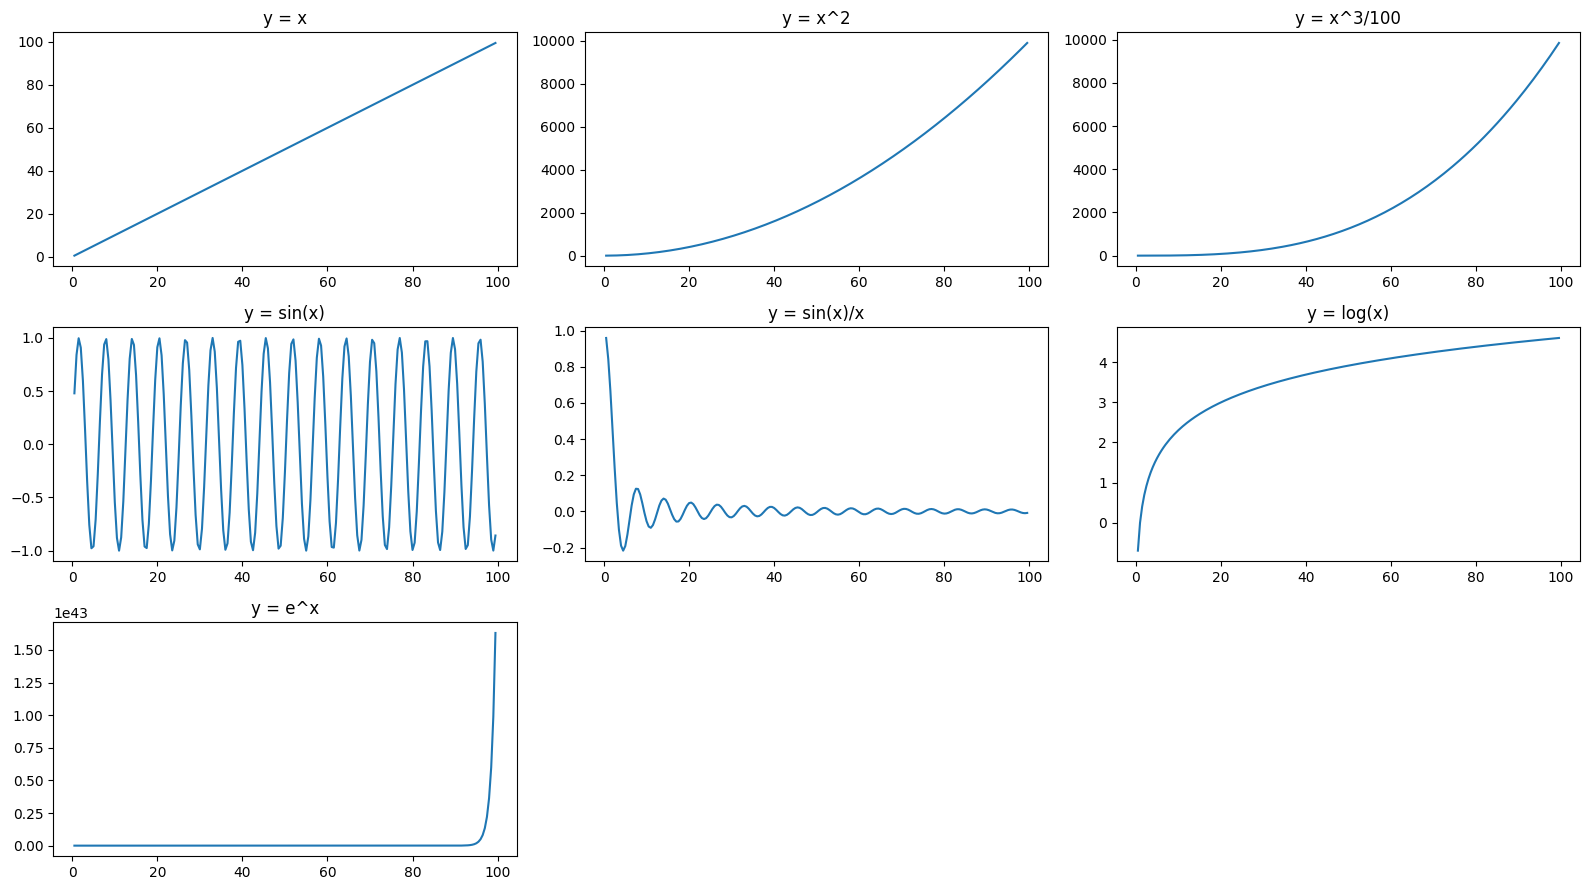

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x_values = np.arange(0.5, 100, 0.5)

# Define the functions
y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

# Plotting the functions
plt.figure(figsize=(16, 9))

plt.subplot(3, 3, 1)
plt.plot(x_values, y1)
plt.title('y = x')

plt.subplot(3, 3, 2)
plt.plot(x_values, y2)
plt.title('y = x^2')

plt.subplot(3, 3, 3)
plt.plot(x_values, y3)
plt.title('y = x^3/100')

plt.subplot(3, 3, 4)
plt.plot(x_values, y4)
plt.title('y = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x_values, y5)
plt.title('y = sin(x)/x')

plt.subplot(3, 3, 6)
plt.plot(x_values, y6)
plt.title('y = log(x)')

plt.subplot(3, 3, 7)
plt.plot(x_values, y7)
plt.title('y = e^x')

plt.tight_layout()
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers from 1 to 2
np.random.seed(42)  # Setting seed for reproducibility
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame
columns = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(matrix, columns=columns)

# Find the column with the highest standard deviation
max_std_col = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

# Print the DataFrame
print("DataFrame:")
print(df)

# Output the results
print("\nColumn with the highest standard deviation:", max_std_col)
print("Row with the lowest mean:", min_mean_row)

DataFrame:
           a         b         c         d         e
0   1.374540  1.950714  1.731994  1.598658  1.156019
1   1.155995  1.058084  1.866176  1.601115  1.708073
2   1.020584  1.969910  1.832443  1.212339  1.181825
3   1.183405  1.304242  1.524756  1.431945  1.291229
4   1.611853  1.139494  1.292145  1.366362  1.456070
5   1.785176  1.199674  1.514234  1.592415  1.046450
6   1.607545  1.170524  1.065052  1.948886  1.965632
7   1.808397  1.304614  1.097672  1.684233  1.440152
8   1.122038  1.495177  1.034389  1.909320  1.258780
9   1.662522  1.311711  1.520068  1.546710  1.184854
10  1.969585  1.775133  1.939499  1.894827  1.597900
11  1.921874  1.088493  1.195983  1.045227  1.325330
12  1.388677  1.271349  1.828738  1.356753  1.280935
13  1.542696  1.140924  1.802197  1.074551  1.986887
14  1.772245  1.198716  1.005522  1.815461  1.706857
15  1.729007  1.771270  1.074045  1.358466  1.115869
16  1.863103  1.623298  1.330898  1.063558  1.310982
17  1.325183  1.729606  1.637557  1

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
# Add a new column "f" as the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the condition
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in the column "g" is "LT8"
num_lt8_rows = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of column "f" for "LT8" and "GT8"
std_dev_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Print the updated DataFrame and results
print("Updated DataFrame:")
print(df)

print("\nNumber of rows where the value in column 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of column 'f' for 'LT8':", std_dev_lt8)
print("Standard deviation of column 'f' for 'GT8':", std_dev_gt8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925  LT8
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442  LT8
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101  LT8
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577  LT8
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923  LT8
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949  LT8
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638  LT8
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069  LT8
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704  LT8
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866  LT8
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944  GT8
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907  LT8
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452  LT8
13  1.542696  1.140924  1.802

12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy allows for performing operations on arrays of different shapes, making it more flexible and concise. The smaller array is "broadcast" across the larger array to make their shapes compatible. Here's a simple example to illustrate broadcasting:

In [ ]:
import numpy as np

# Creating a 2x3 array
arr1 = np.array([[11, 22, 33],
                 [41, 52, 64]])

# Adding a scalar to the entire array using broadcasting
result = arr1 + 15

# Printing the original array and the result
print("Original array:\n", arr1)
print("\nResult after broadcasting:\n", result)

Original array:
 [[11 22 33]
 [41 52 64]]

Result after broadcasting:
 [[21 32 43]
 [51 62 74]]


In this case, the scalar 15 is broadcasted to match the shape of arr1, and then element-wise addition is performed. Broadcasting simplifies the syntax and avoids the need to explicitly create arrays of the same shape before performing operations.

13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np

def custom_argmin(arr):
    # Check if the input array is empty
    if arr.size == 0:
        raise ValueError("Input array is empty")

    # Initialize variables to store the minimum value and its index
    min_val = arr[0]
    min_index = 0

    # Iterate through the array to find the minimum value and its index
    for i, val in enumerate(arr):
        if val < min_val:
            min_val = val
            min_index = i

    return min_index

# Example usage:
arr = np.array([3, 10, 4, 1, 5, 9, 2, 6, 5, 3, 5])
custom_min_index = custom_argmin(arr)

# Verify the result using np.argmin
np_min_index = np.argmin(arr)

print("Custom argmin:", custom_min_index)
print("np.argmin:", np_min_index)

Custom argmin: 3
np.argmin: 3
